# Create space

In [1]:
from mexican_sign_language_toolkit.pose_landmarker import detect_landmarks_from_image, PoseLandmarker
import glob
import numpy as np
images = glob.glob('datasets/dictionary/*.png')
pose_landmarker = PoseLandmarker()
regex,db = pose_landmarker.create_database_from_images(images)
np.save('../checkpoints/sign_language_space.npy', db)
np.save('../checkpoints/regex.npy', regex)

# Load space from a checkpoint

In [1]:
import numpy as np
space = np.load('../checkpoints/sign_language_space.npy', allow_pickle=True)
regex = str(np.load('../checkpoints/regex.npy', allow_pickle=True))
regex

'(?P<noise>[\\n\\r\\s]+)|(?P<BORREGO>BORREGO-1)|(?P<BUHO>BUHO-1)|(?P<BURRO>BURRO-1BURRO-2)|(?P<CABALLO>CABALLO-1CABALLO-2)|(?P<CALAMAR>CALAMAR-1CALAMAR-2)|(?P<CAMARON>CAMARON-1CAMARON-2)|(?P<CANGREJO>CANGREJO-1CANGREJO-2)|(?P<CANGURO>CANGURO-1CANGURO-2)|(?P<CHANGO>CHANGO-1)|(?P<CONEJO>CONEJO-1CONEJO-2)|(?P<FOCA>FOCA-1FOCA-2)|(?P<LOBO>LOBO-1LOBO-2)|(?P<MARIPOSA>MARIPOSA-1MARIPOSA-2)|(?P<OSO>OSO-1)|(?P<PELICANO>PELICANO-1PELICANO-2)'

# Classification

In [2]:
from mexican_sign_language_toolkit.neighbors import Bruteforce
brute_force = Bruteforce(space)
brute_force.classify(space[2]['matrix']),brute_force.classify(space[3]['matrix'])

('BURRO-1', 'BURRO-2')

# Tokenization

In [4]:
from mexican_sign_language_toolkit.lexer import tokenize

match = tokenize(regex)

stream = [brute_force.classify(space[2]['matrix']), brute_force.classify(space[3]['matrix'])]

for signal in stream:
    result = match(signal)
    if result:
        print(result)

('BURRO', 'BURRO-1BURRO-2')


# Pipeline

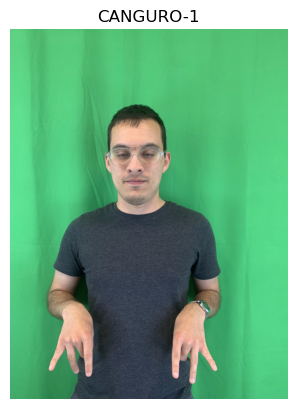

In [1]:
import cv2
import glob
from matplotlib import pyplot as plt
import os

def cv2_imshow(img):
    plt.imshow(img)
    plt.title(os.path.basename(images[0]).replace(".png", ""))
    plt.axis(False)
    plt.show()

images = glob.glob('datasets/dictionary/CANGURO-*.png')
A,B = cv2.imread(images[0]),cv2.imread(images[1])
A,B = cv2.cvtColor(A, cv2.COLOR_BGR2RGB),cv2.cvtColor(B, cv2.COLOR_BGR2RGB)
cv2_imshow(A)

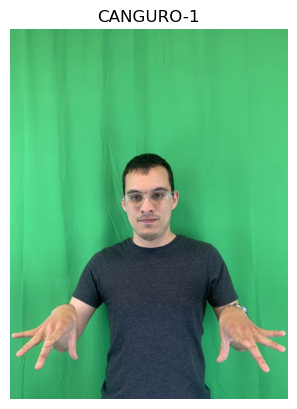

In [2]:
cv2_imshow(B)

In [3]:
from mexican_sign_language_toolkit.pipeline import pipeline
import glob

images = glob.glob('datasets/dictionary/CANGURO-*.png')
A,B = cv2.imread(images[0]),cv2.imread(images[1])
A,B = cv2.cvtColor(A, cv2.COLOR_BGR2RGB), cv2.cvtColor(B, cv2.COLOR_BGR2RGB)


predict = pipeline()
predict(A)
predict(B)

('CANGURO', 'CANGURO-1CANGURO-2')

In [7]:
predict(A)

''

# Test yourself

# Demo 1

In [3]:
import gradio as gr
import numpy as np
from mexican_sign_language_toolkit.pipeline import pipeline
import glob 
predict = pipeline()

def f(image,state):
    state = state + predict(np.array(image))
    return [state,state]

state = gr.State(value="")
demo = gr.Interface(
    f, 
    [gr.Image(),state], 
    ["text", state],
    examples=glob.glob('datasets/dictionary/CANGURO-*.png')
)
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://4daf5e6b7b09c83c6b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# TODO: Apply other approaches

In [21]:
from sklearn.neighbors import KDTree
import numpy as np
from uuid_extensions import uuid7, uuid7str
space = np.array([
    [1,0]
])
db = [uuid7(), uuid7(), uuid7(), uuid7()]

kdt = KDTree(space, leaf_size=30, metric='euclidean')
distance, indices = kdt.query([[1,0]])
space[indices][0]

array([[1, 0]])